# A Convolution model for classifying Hand written digits
<p style='text-align: right'>&copy; V-Vishwanath</p>

***
## Introduction
***

This notebook is a walkthrough guide to build a classifier to classify hand written digits using a convolutional neural network.

The choice of the model is completely experimental, therefore feel free to try out different configurations to get even better results!

***
## Importing libraries
***

The following libraries are used in this model :
- [Numpy](https://numpy.org/) v1.18.5
- [Matplotlib](https://matplotlib.org/) v3.2.2
- [Keras](https://keras.io/) v2.3.1

Dataset credit : http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import Sequential
from keras.utils import to_categorical 
from keras.datasets.mnist import load_data
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, LeakyReLU

Using TensorFlow backend.


***
## Inspecting the dataset
***

The Keras [Datasets](https://keras.io/api/datasets/) API provides small datasets in vectorized versions, ready to implement in numpy.
This notebook uses the MNIST dataset of hand written digits which the API provides to create a classifier to classify hand written digits.
The dataset contains a total of 70,000 28x28 grayscale images and their corresponding labels, out of which 60,000 are partitioned for the training and 10,000 for testing.

The load_data() function returns a tuple of 2 tuples, the first one containing the training pair, and the other contianing the testing pair.

We start by importing the dataset using the **load_data** method

In [2]:
(train_images, train_labels), (test_images, test_labels) = load_data()

print(f'Number of training images : {train_images.shape[0]}')
print(f'Number of testing images : {test_images.shape[0]}')

Number of training images : 60000
Number of testing images : 10000


***
Although the images are grayscale, we need to specify a color channel for being able to visualize the matrices in an image format. So we get the extra dimension by using the expand_dims function from the numpy library.

Note that the first dimension specifies the number of images, the second and third specify the number of rows and columns, and the fourth "axis", or dimension specifies the color channel. Following the computer's way, the fourth dimension becomes the '3rd axis', hence axis=3

In [3]:
print(f'Training images shape (before adding the color channel) : {train_images.shape}')
print(f'Testing images shape (before adding the color channel) : {test_images.shape}\n')

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(f'Training images shape (after adding the color channel) : {train_images.shape}')
print(f'Testing images shape (after adding the color channel) : {test_images.shape}')

Training images shape (before adding the color channel) : (60000, 28, 28)
Testing images shape (before adding the color channel) : (10000, 28, 28)

Training images shape (after adding the color channel) : (60000, 28, 28, 1)
Testing images shape (after adding the color channel) : (10000, 28, 28, 1)


***
We can visualize the data using **matplotlib**.

We create a figure of 4 rows and 4 columns, and give some offset (1.5x in rows and 2x in columns is used here) to print out a chart of 16 random images from the training set. Feel free to run the next cell multiple times to get an idea of the dataset.

Note that we are not using all the values from the color channel even though we have only one value. Matplotlib interprets images as having **3** color channels, therefore we need to **specify** the color channel while using the imshow function.


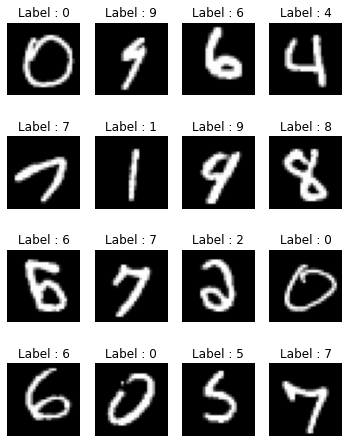

In [4]:
random_picks = np.random.randint(low=0, high=train_images.shape[0], size=(16, ))

fig = plt.figure(figsize=(4*1.5, 4*2))
for idx, i in enumerate(random_picks):
    plt.subplot(4, 4, idx+1)
    plt.imshow(train_images[i, :, :, 0], cmap='gray')
    plt.title(f'Label : {train_labels[i]}')
    plt.axis('off')

plt.show()

***
## Preprocessing the dataset
***

The dataset is a collection of white text on a black background, as seen above. Since this is not a common scenario, ie - generally black text on a white background is prefered, we invert the colors.

As we know that the pixels are a value from the range of 0 to 255, we can invert the images by taking their difference from the highest value, ie - 255.

As an example, say the value of a pixel is 12, which is closer to 0, ie - this will be a black pixel.  
On taking the difference with 255, we get the new value to be (255 - 12) = 243, ie - a white pixel, as it is closer to 255.

In [5]:
train_images = 255 - train_images
test_images = 255 - test_images

We can visualize the images in the same way again.

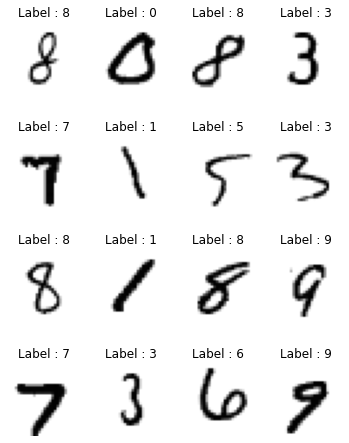

In [6]:
random_picks = np.random.randint(low=0, high=train_images.shape[0], size=(16, ))

fig = plt.figure(figsize=(4*1.5, 4*2))
for idx, i in enumerate(random_picks):
    plt.subplot(4, 4, idx+1)
    plt.imshow(train_images[i, :, :, 0], cmap='gray')
    plt.title(f'Label : {train_labels[i]}')
    plt.axis('off')

plt.show()

***
Now we normalize the dataset, ie - get all the values into a similar, easy to process range. A typical range would be \[0, 1\], although there may be other preferences, like normalizing in the range of \[-1, 1\].

This notebook uses the range \[0, 1\]. Therefore, we divide all the pixels with 255. If you want to experiment with the other range mentioned about, ie - \[-1, 1\], you would have to normalize it in the following way :  

$Normalized = (images + 127.5) / 127.5$
                        
                         
since, $255(highest value) - 0(lowest value) / 2 = 127.5$

In [7]:
train_images = train_images / 255
test_images = test_images / 255

***
For the labels, we one-hot encode them using the **to_categorical()** function in the keras utils API. 

One-hot encoding basically signifies the probability of each class. Since a neural network cannot predict something with an 100% accuracy, we generate the probabilities of each class and pick the class with the highest probability, ie - the class which the neural network feels the most accurate for the given input.

In this case, there are 10 classes, digits from 0 to 9. Therefore our one hot encodings will be a vector of 10 probabilities, where the actual class has a probability of 1, ie - 100% assurance, and the rest have 0s.

An example would be:  
label : 5  
one_hot_encoded label : (0, 0, 0, 0, 0, 1, 0, 0, 0, 0)

Notice the 1 in the 6th position. The labels start from 0.

In [8]:
print(f'Training labels shape (before one-hot encoding) : {train_labels.shape}')
print(f'Testing labels shape (before one-hot encoding) : {test_labels.shape}\n')

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(f'Training labels shape (after one-hot encoding) : {train_labels.shape}')
print(f'Testing labels shape (after one-hot encoding) : {test_labels.shape}')

Training labels shape (before one-hot encoding) : (60000,)
Testing labels shape (before one-hot encoding) : (10000,)

Training labels shape (after one-hot encoding) : (60000, 10)
Testing labels shape (after one-hot encoding) : (10000, 10)


***
## Defining the model
***

We'll be using convolutional layers to identify features, and max pooling to reduce the size.

The model's architecture is as follows :
- Convolution layer with 32 filters of size 3x3
- LeakyReLU activation  

- MaxPooling to reduce the dimensions, with a kernel size of 2x2  

- Convolution layer with 64 filters of size 3x3
- LeakyReLU activation  

- MaxPooling to reduce the dimensions, with a kernel size of 2x2  

- Convolution layer with 128 filters of size 3x3  

- LeakyReLU activation  

- Flatten layer, which flattens the activations into a single vector
- Dense layer with 128 neurons, activated by the ReLU activation function  

- Output layer, which is a Dense layer with 10 neurons, activated by a softmax

In [9]:
model = Sequential(
    [
        Conv2D(32, (3, 3), padding='same', input_shape=[28, 28, 1]),
        LeakyReLU(),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), padding='same'),
        LeakyReLU(),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), padding='same'),
        LeakyReLU(),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model.name = 'Digit Classifier'
model.summary()

Model: "Digit Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)    

***
We'll compile the model using the categorical crossentropy loss function and the adam optimizer. Other optimizers with adaptive learning rates, such as SGD and RMSProp will work equally well.

We'll also include the accuracy as a metric to track

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

***
## Training and evaluation
***

***
Now we fit the model on the training images and the training labels. The number of epochs will be 10, and we have included a validation split which will take a random split of the specified size from the training data and try to evaluate it's performance on that split.

We also store the progress in the history to later plot the learning curves

It took me about 2 minutes on an Nvidia GTX 1070 GPU

In [11]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs = 10, 
    validation_split = 0.1,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 247us/step - loss: 0.1314 - acc: 0.9588 - val_loss: 0.0488 - val_acc: 0.9860
Epoch 2/10
54000/54000 [==============================] - 12s 220us/step - loss: 0.0462 - acc: 0.9855 - val_loss: 0.0505 - val_acc: 0.9847
Epoch 3/10
54000/54000 [==============================] - 12s 221us/step - loss: 0.0346 - acc: 0.9892 - val_loss: 0.0504 - val_acc: 0.9853
Epoch 4/10
54000/54000 [==============================] - 12s 222us/step - loss: 0.0271 - acc: 0.9915 - val_loss: 0.0410 - val_acc: 0.9887
Epoch 5/10
54000/54000 [==============================] - 12s 221us/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.0408 - val_acc: 0.9910
Epoch 6/10
54000/54000 [==============================] - 12s 222us/step - loss: 0.0220 - acc: 0.9934 - val_loss: 0.0463 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 12s 220us/step - loss: 0.0200 - acc: 0.9936 - val_loss: 0.0

***
We see that the model ended up with a **99% accuracy on the training set**, along with approximately **99% on the validation set**, although the validation set belongs to the same distribution. We can check the accuracy of the model for the entire training set by using the evaluate method.

In [12]:
loss, acc = model.evaluate(train_images, train_labels)
print(f'\nThe model attains {loss} loss with {acc * 100}% accuracy on the train set')

60000/60000 [==============================] - 6s 107us/step

The model attains 0.01146363048633269 loss with 99.71333146095276% accuracy on the train set


***
We can do the same thing with the test set to see how well the model perform on that distribution.

Remember, the model has not seen the test set till now. The validation has been done on a part of the training set!

In [13]:
loss, acc = model.evaluate(test_images, test_labels)
print(f'\nThe model attains {loss} loss with {acc * 100}% accuracy on the test set')

10000/10000 [==============================] - 1s 124us/step

The model attains 0.0385191850712687 loss with 99.14000034332275% accuracy on the test set


***
## Plotting the learning curves
***

We can see the model's performace from the history object by plotting the learning curves.

We'll start by plotting the loss curve, which should decrease as the number of epochs increase

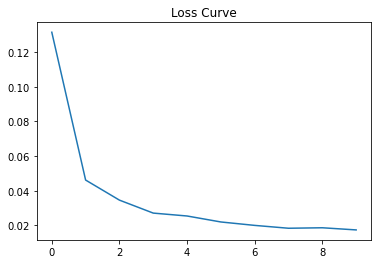

In [14]:
loss = history.history['loss']
epochs = range(10)

plt.plot(epochs, loss)
plt.title('Loss Curve')
plt.show()

***
We can plot the accuracy curve in the same manner.

The accuracy should increase with the number of epochs

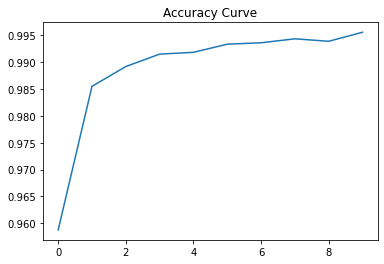

In [15]:
acc = history.history['acc']
epochs = range(10)

plt.plot(epochs, acc)
plt.title('Accuracy Curve')
plt.show()

***
## Results and conclusion
***

The accuracy turns out to be pretty good, and the learning curves look fine. Therefore, we can safely conclude that the model is not prone to any overfitting in this case. 

We can take a look at some of the predictions by running the below cell. It will pick 16 images at random from the testing set and show the corresponding ground truth and predictions.

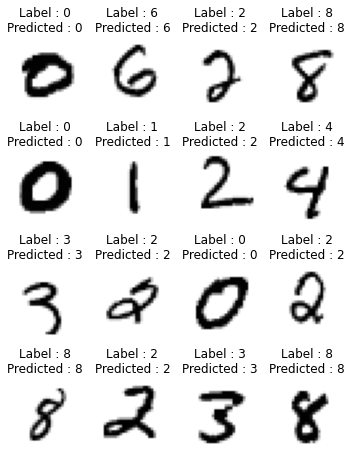

In [16]:
random_picks = np.random.randint(low=0, high=test_images.shape[0], size=(16, ))

fig = plt.figure(figsize=(4*1.5, 4*2))
for idx, i in enumerate(random_picks):

    # We need to add an extra dimension denoting the batch size, or the number of images to process. 
    # Here, we use the expand_dims function to increase the dimension at axis=0, ie- the first dimension
    image = test_images[i, :, :, :]
    image = np.expand_dims(image, axis=0)
    prediction = model.predict_classes(image)[0] # the model.predict_classes returns the prediction as an array

    # Since the classes have been one hot encoded, we need to get back the label for the image 
    # For that, we use the argmax function of the numpy library to get the index of the maximum element (ie - 1)
    label = np.argmax(test_labels[i])

    plt.subplot(4, 4, idx+1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title(f'Label : {label}\nPredicted : {prediction}')
    plt.axis('off')

plt.show()

***
We can save the model to our hard disk using the save function

In [17]:
model.save('./DigitClassifier.h5')
print('Model saved successfully!')

Model saved successfully!
